<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import gym

# Load the FrozenLake environment
# env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="human", new_step_api=True)
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="human")


n_states = env.observation_space.n
n_actions = env.action_space.n

gamma = 0.95  # Discount factor
theta = 1e-6  # Convergence threshold

# Initialize value table
V = np.zeros(n_states)
policy = np.zeros(n_states, dtype=int)

# Value Iteration Algorithm
def value_iteration():
    global V, policy
    while True:
        delta = 0
        new_V = np.copy(V)
        for s in range(n_states):
            q_values = np.zeros(n_actions)
            for a in range(n_actions):
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    if done:
                        q_values[a] += prob * reward
                    else:
                        q_values[a] += prob * (reward + gamma * V[next_state])
            new_V[s] = max(q_values)
            delta = max(delta, abs(V[s] - new_V[s]))
            policy[s] = np.argmax(q_values)
        V = new_V
        if delta < theta:
            break

# Extract optimal policy using the converged value function
def extract_policy():
    for s in range(n_states):
        q_values = np.zeros(n_actions)
        for a in range(n_actions):
            for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                if done:
                    q_values[a] += prob * reward
                else:
                    q_values[a] += prob * (reward + gamma * V[next_state])
        policy[s] = np.argmax(q_values)

# Display the policy with start, goal, and holes
def display_policy():
    actions = ['←', '↓', '→', '↑']
    grid_size = int(np.sqrt(n_states))

    # Get the map layout of FrozenLake
    lake_map = env.unwrapped.desc  # Extracts the grid layout

    print("\nOptimal Policy:\n")
    for i in range(grid_size):
        row = ""
        for j in range(grid_size):
            state = i * grid_size + j
            tile = lake_map[i, j].decode("utf-8")  # Get the character from the FrozenLake map

            if tile == 'H':
                cell = 'H'  # Hole
            elif tile == 'G':
                cell = 'G'  # Goal
            elif tile == 'S':
                cell = 'S'  # Start position
            else:
                cell = actions[policy[state]]  # Normal state, show policy action

            row += f"| {cell} "
        row += "|"
        print(row)
        print("-" * (grid_size * 4 + 1))

# Run the value iteration algorithm
value_iteration()
extract_policy()
display_policy()

# Reset the environment
env.reset()


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(



Optimal Policy:

| S | ↑ | ← | ↑ |
-----------------
| ← | H | ← | H |
-----------------
| ↑ | ↓ | ← | H |
-----------------
| H | → | ↓ | G |
-----------------


0

In [13]:
def run_episode(policy):
    state = env.reset()  # Remove the comma and underscore
    total_reward = 0
    done = False

    # Render initial state
    env.render()

    while not done:
        action = policy[state]
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward

        # Render each step
        env.render()

        # Optional: add a small delay to make visualization easier to follow
        import time
        time.sleep(0.5)

    return total_reward

In [ ]:
print(policy.reshape(4,4))  # Since it's a 4x4 grid


[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


In [15]:
def run_episode(policy):
    # For older versions of gym
    state = env.reset()
    # For newer versions, uncomment the line below instead
    # state, _ = env.reset()

    total_reward = 0
    done = False

    # In Colab, you need to capture the rendered frames
    frames = []
    frames.append(env.render())

    while not done:
        action = policy[state]

        # For older gym versions
        next_state, reward, done, _ = env.step(action)
        # For newer gym versions, uncomment the line below instead
        # next_state, reward, terminated, truncated, _ = env.step(action)
        # done = terminated or truncated

        state = next_state
        total_reward += reward

        # Capture the render frame
        frames.append(env.render())

        # Optional: add a small delay
        import time
        time.sleep(0.5)

    return total_reward, frames

TypeError: Invalid shape (1, 256, 256, 3) for image data

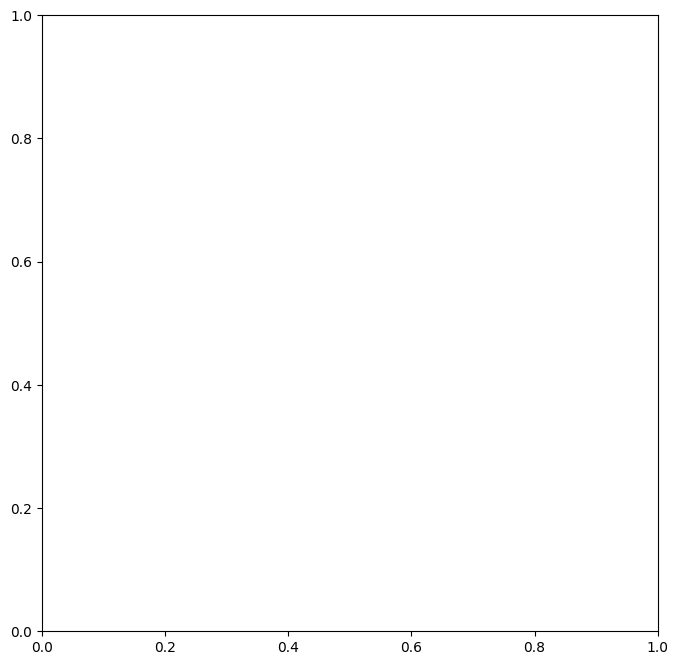

In [16]:
# Setup for rendering in Colab
from IPython import display
import matplotlib.pyplot as plt

# Create environment with rgb_array render mode
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")

# Run episode and get frames
reward, frames = run_episode(policy)

# Display animation in Colab
plt.figure(figsize=(8, 8))
for i, frame in enumerate(frames):
    plt.imshow(frame)
    plt.title(f"Step {i}")
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.5)